In [1]:
from datetime import datetime
orig=datetime(2020,3,1)
convme=lambda s:(datetime.strptime(str(s),"%d. %m. %Y")-orig).days

In [2]:
620*24/1000.

14.88

In [153]:
import numpy as np
inaddr='https://onemocneni-aktualne.mzcr.cz/'
ifile="C:/Users/Admin/Downloads/COVID-19 7_00_Stránka 1_Kombinovaný graf.csv"
datat=np.genfromtxt(ifile,delimiter=",",skip_header=1,converters={0:convme},unpack=True,usecols=[1,2])

OSError: C:/Users/Admin/Downloads/COVID-19 7_00_Stránka 1_Kombinovaný graf.csv not found.

In [39]:
inp1=[a[:a.find(',')] for a in open(ifile).readlines()[1:]]
days=[convme(i) for i in inp1]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

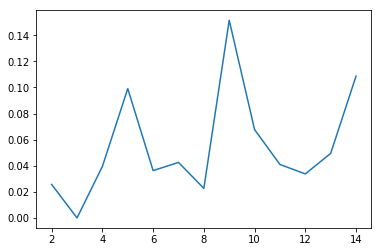

In [51]:
%matplotlib inline
from matplotlib import pyplot as pl
pl.plot(days,datat[1]/datat[0])
days

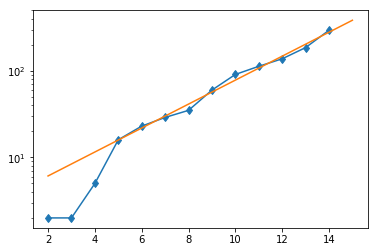

In [68]:
days=np.array(days)
infec=np.cumsum(datat[1])
sel=(days>4)*(days<15)
pl.semilogy(days,(infec),'d-')
indx=np.polyfit(np.array(days)[sel],np.log(infec[sel]),1)
pl.semilogy(days,np.exp(np.polyval(indx,days)))

In [150]:
np.exp(indx[0]),indx[0]

NameError: name 'indx' is not defined

In [1]:
import textract

In [4]:
ss=textract.process("/home/limu/Dropbox/Data/infecti/C_0315_pagineAree_5351_15_file.pdf")

In [8]:
lines=str(ss).split('\\n')
s=lines[20]

In [19]:
capnum=[i for i in range(1,len(lines)) if lines[i].upper()==lines[i] and lines[i-1]=='' and lines[i].isupper()]

In [281]:
#capnum=[i for i in range(len(lines)) if lines[i] in capits]
#[lines[i] for i in capnum]
def glen(lines,i):
    for j in range(i+1,len(lines)):
        if lines[j]=='': return j-i
    return len(lines)-j
grplen=[glen(lines,i) for i in capnum]
grplen

[14, 10, 9, 7, 10, 11, 7, 7, 6, 6, 11, 7, 1, 4, 5, 2, 3, 6, 3, 2, 7, 1, 1, 1]

In [308]:
regione={}
stat={}
def stat_update(date,sel1,sel2,lines,capnum,grplen):
    vsum=0
    for k in sel1:
        for i in range(grplen[k]-2):
            cita=lines[capnum[k]+1+i]
            cita=cita[0].upper()+cita[1:].lower()
            regione[cita]=lines[capnum[k]]
            val=int(lines[capnum[k]+grplen[k]+1+i])
            if cita in stat:
                stat[cita][date]=val
                #stat[cita].append([date,val])
            else:
                stat[cita]={date:val}
                #stat[cita]=[[date,val]]
            vsum+=val
                
    for k in sel2:
        for i in range(grplen[k]-2):
            cita=lines[capnum[k]+1+i]
            cita=cita[0].upper()+cita[1:].lower()
            regione[cita]=lines[capnum[k]]
            val=int(lines[capnum[k]+grplen[k]+1+i])
            if cita in stat:
                stat[cita][date]=val
            else:
                stat[cita]={date:val}
            vsum+=val
    return vsum


In [184]:
#stat.keys
stat={}
stat_update('0315',sel1,sel2)

7362

In [309]:
def parse_file(fpath="/home/limu/Dropbox/Data/infecti/C_0313_pagineAree_5351_11_file.pdf",rep=0):
    ss=textract.process(fpath)
    import os
    fname=os.path.basename(fpath)
    #ss=textract.process("/home/limu/Dropbox/Data/infecti/C_0314_pagineAree_5351_15_file.pdf")
    #ss=textract.process("/home/limu/Dropbox/Data/infecti/C_0315_pagineAree_5351_15_file.pdf")
    lines=str(ss).split('\\n')
    capnum=[i for i in range(1,len(lines)) if lines[i].upper()==lines[i] and lines[i-1]=='' and lines[i].isupper()]
    specnum=[i for i in range(len(lines)) if lines[i].find('inistero')>0]
    if specnum[0]==0: specnum=specnum[1:]
    capnum+=specnum
    for i in specnum:
        lines[i]='Totale'
    if rep==1:return lines,capnum
    grplen=[glen(lines,i) for i in capnum]
    if rep==2:
        return grplen
    sel1,sel2=[],[]
    for k in range(len(capnum)): 
        final=lines[capnum[k]+grplen[k]+1:][grplen[k]].lower()
        if final.find('totale')>=0 or final.find('aggiorname')>0:
            sel1+=[k]
            continue
        final=lines[capnum[k]+grplen[k]:][grplen[k]].lower()
        if final.find('totale')>=0 or final.find('aggiorname')>0:
            sel2+=[k]
    if rep==3:
        return sel1,sel2
    osum=stat_update(fname[2:6],sel1,sel2,lines,capnum,grplen)
    print('updating from '+fname)
    return len(lines),len(capnum),len(sel1)+len(sel2),osum
#parse_file()

In [284]:
stat={}
parse_file(flist[-1],rep=0)

(386, 24, 20, 16826)

In [286]:
flist

['/home/limu/Dropbox/Data/infecti/C_0308_pagineAree_5351_0_file.pdf',
 '/home/limu/Dropbox/Data/infecti/C_0309_pagineAree_5351_3_file.pdf',
 '/home/limu/Dropbox/Data/infecti/C_0310_pagineAree_5351_5_file.pdf',
 '/home/limu/Dropbox/Data/infecti/C_0311_pagineAree_5351_7_file.pdf',
 '/home/limu/Dropbox/Data/infecti/C_0312_pagineAree_5351_9_file.pdf',
 '/home/limu/Dropbox/Data/infecti/C_0313_pagineAree_5351_11_file.pdf',
 '/home/limu/Dropbox/Data/infecti/C_0314_pagineAree_5351_15_file.pdf',
 '/home/limu/Dropbox/Data/infecti/C_0315_pagineAree_5351_15_file.pdf']

In [270]:
sel1,sel2=[],[]
for k in range(len(capnum)): 
    final=lines[capnum[k]+grplen[k]+1:][grplen[k]].lower()
    if final.find('totale')>=0 or final.find('aggiorname')>0:
        sel1+=[k]
    final=lines[capnum[k]+grplen[k]:][grplen[k]].lower()
    if final.find('totale')>=0 or final.find('aggiorname')>0:
        sel2+=[k]
len(sel1),len(capnum)
##[lines[z:z+10] for z in zbeg]

(17, 24)

In [269]:
sel2

[9, 13, 20]

In [311]:
[(parse_file(f,rep=0)) for f in flist[3:]]

updating from C_0311_pagineAree_5351_7_file.pdf
updating from C_0312_pagineAree_5351_9_file.pdf
updating from C_0313_pagineAree_5351_11_file.pdf
updating from C_0314_pagineAree_5351_15_file.pdf
updating from C_0315_pagineAree_5351_15_file.pdf


[(381, 22, 20, 12025),
 (388, 24, 20, 14501),
 (388, 24, 20, 16826),
 (391, 24, 20, 18799),
 (386, 24, 20, 23489)]

In [224]:
stat={}
import os
fname=os.path.basename(flist[-1])
osum=stat_update(fname[2:6],sel1,sel2)
fname[2:6]

'0315'

In [313]:
flist=sorted(glob("/home/limu/Dropbox/Data/infecti/C_*.pdf"))
stat={}
[parse_file(f) for f in flist[1:]]

updating from C_0309_pagineAree_5351_3_file.pdf
updating from C_0310_pagineAree_5351_5_file.pdf
updating from C_0311_pagineAree_5351_7_file.pdf
updating from C_0312_pagineAree_5351_9_file.pdf
updating from C_0313_pagineAree_5351_11_file.pdf
updating from C_0314_pagineAree_5351_15_file.pdf
updating from C_0315_pagineAree_5351_15_file.pdf
updating from C_0316_pagineAree_5351_17_file.pdf
updating from C_0317_pagineAree_5351_19_file.pdf
updating from C_0318_pagineAree_5351_21_file.pdf
updating from C_0319_pagineAree_5351_23_file.pdf


[(374, 23, 23, 8741),
 (375, 23, 23, 9502),
 (381, 22, 20, 12025),
 (388, 24, 20, 14501),
 (388, 24, 20, 16826),
 (391, 24, 20, 18799),
 (386, 24, 20, 23489),
 (386, 24, 20, 26457),
 (386, 24, 20, 29870),
 (393, 24, 21, 33601),
 (393, 24, 21, 37939)]

In [344]:
zmax='0315'
selmax=[k for k in stat.keys() if zmax in stat[k] and len(stat[k])>10 and stat[k][zmax]>50 ]
#zlist=sorted(list(stat.keys()))
#[len(stat[k]) for k in zlist]
import numpy as np
frac=np.array([[stat[s]["%04i"%(i+1)]/stat[s]["%04i"%(i)] for i in range(309,319)] for s in selmax]).T

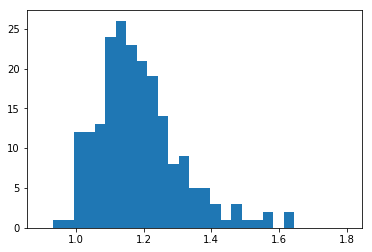

In [335]:
%matplotlib inline
from matplotlib import pyplot as pl
pl.hist(frac.ravel(),np.r_[0.9:1.8:30j]);

In [347]:
klist=["%04i"%(i) for i in range(309,319)]
gcurve=lambda s:np.array([stat[s][k] for k in klist])
#[pl.plot(gcurve(c)) for c in selmax]

In [348]:
alstat=[gcurve(s) for s in selmax]

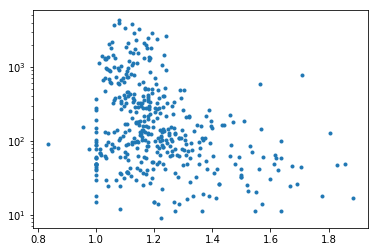

In [358]:
xval=frac.ravel()
yval=np.array(alstat).T.ravel()
sel=xval<2
pl.semilogy(xval[sel],yval[sel],'.')

In [361]:
[selmax[j] for j in np.where(frac<1)[1]]

['Roma', 'Imperia', 'Udine']

(1, 1.9)

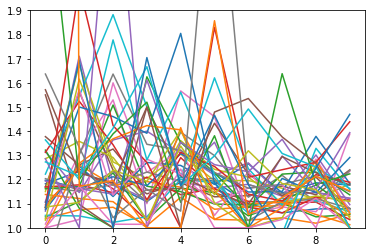

In [346]:
[pl.plot(f) for f in frac.T];
pl.ylim(1,1.9)

In [336]:
c="%04i"%(313)
i=2
lst=np.argsort(frac[0])[::-1]
[(selmax[i],frac[0][i],stat[selmax[i]][c]) for i in lst[:10]]

[('Genova', 1.8046875, 128),
 ('Monza brianza', 1.5664335664335665, 143),
 ('Imperia', 1.5609756097560976, 41),
 ('Siena', 1.4146341463414633, 41),
 ('La spezia', 1.4054054054054055, 37),
 ('Savona', 1.403225806451613, 62),
 ('Mantova', 1.3957219251336899, 187),
 ('Ancona', 1.360759493670886, 158),
 ('Pescara', 1.3541666666666667, 48),
 ('Massa carrara', 1.353846153846154, 65)]

In [14]:
import numpy as np
stat=np.load("../../Data/infecti/hashes.npy").reshape(1)[0]

In [22]:
stat['Bologna']

[['0315', 230]]

In [324]:
reglist=list(set(list(regione.values())))
#reghash={}
#ase=set(list(regione.values()))
reglist.remove('Totale')
for s in reglist:
    reghash[s]=[l for l in regione.keys() if regione[l]==s]

In [326]:
regstat={}
for s in reglist:
    regstat[s] = [[stat[reghash[s][0]][j],sum([stat[l][j] for l in reghash[s] if len(stat[l])>j])] for j in range(3)]

KeyError: 0

In [124]:
[len(reghash[s]) for s in reglist]

[5, 10, 9, 5, 5, 4, 1, 4, 8, 13, 11, 1, 2, 5, 4, 7, 4, 5]

In [127]:
regstat

{'CAMPANIA': [['0315', 323], ['0314', 265], ['0313', 215]],
 'TOSCANA': [['0315', 772], ['0314', 592], ['0313', 428]]}

In [135]:
s=reglist[2]
j=0
[stat[l][j][0] for l in reghash[s] if len(stat[l])>j]

['0315', '0315', '0315', '0315', '0315', '0315', '0315', '0315', '0315']

In [136]:
s=reglist[4]
[len(stat[l]) for l in reghash[s]]

[3, 3, 3, 3, 3]

In [138]:
np.save("/home/limu/Dropbox/Data/infecti/hashes.npy",stat)